In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.4.0-rc0


In [6]:
from tensorflow import keras

In [7]:
print(keras.__version__)

2.4.0


# 1. 이미지 분류기

## 데이터셋 적재하기

In [41]:
fashion_mnist = keras.datasets.fashion_mnist

In [42]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [43]:
X_train_full.shape

(60000, 28, 28)

In [44]:
X_train_full.dtype

dtype('uint8')

In [45]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [46]:
class_names = ["T-SHirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 모델 만들기

In [61]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## 모델 훈련과 평가

In [64]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 594us/step - loss: 0.9643 - accuracy: 0.6867 - val_loss: 0.5101 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 1s 507us/step - loss: 0.5008 - accuracy: 0.8239 - val_loss: 0.4602 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 1s 501us/step - loss: 0.4480 - accuracy: 0.8422 - val_loss: 0.4368 - val_accuracy: 0.8432
Epoch 4/30
1719/1719 [==============================] - 1s 504us/step - loss: 0.4184 - accuracy: 0.8526 - val_loss: 0.4137 - val_accuracy: 0.8526
Epoch 5/30
1719/1719 [==============================] - 1s 502us/step - loss: 0.4009 - accuracy: 0.8586 - val_loss: 0.3741 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 1s 506us/step - loss: 0.3766 - accuracy: 0.8688 - val_loss: 0.3707 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 1s 505us/step - loss: 0.3665 - accuracy: 0.8717 - val_loss: 0.3849 -

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

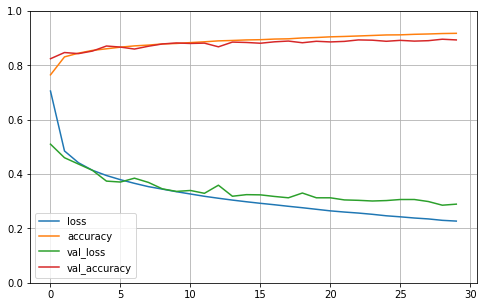

In [65]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [66]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 320us/step - loss: 0.3312 - accuracy: 0.8840


[0.33115333318710327, 0.8840000033378601]

## 모델 예측

In [67]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[ 7.1466222e-44,  0.0000000e+00,  8.9683102e-44, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -2.0000000e+00,
         0.0000000e+00, -2.0000000e+00,  1.8664672e+08,  2.3549907e+20,
         2.4821389e+05,  3.9505281e+30],
       [ 6.8885191e+22,  1.4183974e-19,  6.7289760e+08,  9.1756927e+02,
         5.3631910e-39,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -2.0000000e+00]], dtype=float32)

In [68]:
y_proba.round(2)

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -2.0000000e+00,
         0.0000000e+00, -2.0000000e+00,  1.8664672e+08,  2.3549907e+20,
         2.4821391e+05,  3.9505281e+30],
       [ 6.8885191e+22,  0.0000000e+00,  6.7289760e+08,  9.1757001e+02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -2.0000000e+00]], dtype=float32)

In [70]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/yeomyungro/miniforge3/envs/atf24/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 9, 0])

# 2. 주택 가격 예측(회귀)

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
housing = fetch_california_housing()

In [11]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 520us/step - loss: 1.4272 - val_loss: 0.6015
Epoch 2/20
363/363 [==============================] - 0s 374us/step - loss: 0.5472 - val_loss: 0.5049
Epoch 3/20
363/363 [==============================] - 0s 370us/step - loss: 0.4787 - val_loss: 0.5204
Epoch 4/20
363/363 [==============================] - 0s 368us/step - loss: 0.4752 - val_loss: 0.5085
Epoch 5/20
363/363 [==============================] - 0s 364us/step - loss: 0.5159 - val_loss: 0.4709
Epoch 6/20
363/363 [==============================] - 0s 363us/step - loss: 0.4315 - val_loss: 0.4593
Epoch 7/20
363/363 [==============================] - 0s 671us/step - loss: 0.4547 - val_loss: 0.4559
Epoch 8/20
363/363 [==============================] - 0s 370us/step - loss: 0.4100 - val_loss: 0.4647
Epoch 9/20
363/363 [==============================] - 0s 368us/step - loss: 0.4317 - val_loss: 0.4658
Epoch 10/20
363/363 [==============================] - 0s 367us/step - loss: 0.435

In [77]:
print(mse_test)

0.3959297239780426


In [99]:
for pred, answer in zip(y_pred, y_test):
    print("예측 : {:0.3f}, 정답 : {}, 차이(절대값) : {:0.3f}".format(pred[0], answer, abs(pred[0]-answer)))

예측 : 3.075, 정답 : 2.261, 차이(절대값) : 0.814
예측 : 0.878, 정답 : 0.698, 차이(절대값) : 0.180
예측 : 1.391, 정답 : 1.075, 차이(절대값) : 0.316


# 3. 함수형 API를 사용해 복잡한 모델 만들기

Wide&Deep 신경망 구조

In [106]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [107]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           930         dense_17[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_18[0][0]             

In [108]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 596us/step - loss: 2.8786 - val_loss: 0.8514
Epoch 2/20
363/363 [==============================] - 0s 440us/step - loss: 0.8340 - val_loss: 0.7582
Epoch 3/20
363/363 [==============================] - 0s 442us/step - loss: 0.7347 - val_loss: 0.7139
Epoch 4/20
363/363 [==============================] - 0s 445us/step - loss: 0.6788 - val_loss: 0.6707
Epoch 5/20
363/363 [==============================] - 0s 732us/step - loss: 0.6400 - val_loss: 0.6357
Epoch 6/20
363/363 [==============================] - 0s 588us/step - loss: 0.5967 - val_loss: 0.6106
Epoch 7/20
363/363 [==============================] - 0s 452us/step - loss: 0.6399 - val_loss: 0.5896
Epoch 8/20
363/363 [==============================] - 0s 451us/step - loss: 0.5581 - val_loss: 0.5718
Epoch 9/20
363/363 [==============================] - 0s 450us/step - loss: 0.5348 - val_loss: 0.5610
Epoch 10/20
363/363 [==============================] - 0s 452us/step - loss: 0.517

In [109]:
print(mse_test)

0.45962586998939514


일부 특성은 짧은 경로로 전달하고 다른 특성들(중복 가능)은 깊은 경로로 전달하고 싶은 경우

In [112]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [113]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         dense_20[0][0]                   
____________________________________________________________________________________________

In [114]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(mse_test)

Epoch 1/20
363/363 [==============================] - 0s 620us/step - loss: 3.7363 - val_loss: 0.9034
Epoch 2/20
363/363 [==============================] - 0s 460us/step - loss: 0.8755 - val_loss: 0.7139
Epoch 3/20
363/363 [==============================] - 0s 455us/step - loss: 0.6742 - val_loss: 0.6585
Epoch 4/20
363/363 [==============================] - 0s 458us/step - loss: 0.6123 - val_loss: 0.6325
Epoch 5/20
363/363 [==============================] - 0s 464us/step - loss: 0.6098 - val_loss: 0.6141
Epoch 6/20
363/363 [==============================] - 0s 728us/step - loss: 0.5732 - val_loss: 0.5997
Epoch 7/20
363/363 [==============================] - 0s 461us/step - loss: 0.5824 - val_loss: 0.5868
Epoch 8/20
363/363 [==============================] - 0s 463us/step - loss: 0.5564 - val_loss: 0.5754
Epoch 9/20
363/363 [==============================] - 0s 451us/step - loss: 0.5461 - val_loss: 0.5662
Epoch 10/20
363/363 [==============================] - 0s 455us/step - loss: 0.531

# 4. 모델 저장과 복원

## 모델 저장

In [115]:
model.save("my_keras_model.h5")

## 모델 복원

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

## 훈련 도중 일정 간격으로 체크포인트 저장

매 에포크의 끝마다 저장

In [117]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True) # 훈련 시 검증 세트를 이용할 때 최상의 검증 세트 점수에서만 모델 저장
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 복원

Epoch 1/20
363/363 [==============================] - 0s 530us/step - loss: 0.4866 - val_loss: 0.5067
Epoch 2/20
363/363 [==============================] - 0s 465us/step - loss: 0.4890 - val_loss: 0.5040
Epoch 3/20
363/363 [==============================] - 0s 461us/step - loss: 0.4834 - val_loss: 0.5028
Epoch 4/20
363/363 [==============================] - 0s 458us/step - loss: 0.4825 - val_loss: 0.4999
Epoch 5/20
363/363 [==============================] - 0s 460us/step - loss: 0.4780 - val_loss: 0.4997
Epoch 6/20
363/363 [==============================] - 0s 570us/step - loss: 0.4771 - val_loss: 0.4989
Epoch 7/20
363/363 [==============================] - 0s 561us/step - loss: 0.4765 - val_loss: 0.4950
Epoch 8/20
363/363 [==============================] - 0s 461us/step - loss: 0.4734 - val_loss: 0.4954
Epoch 9/20
363/363 [==============================] - 0s 461us/step - loss: 0.4707 - val_loss: 0.4913
Epoch 10/20
363/363 [==============================] - 0s 459us/step - loss: 0.472

일정 에포크(*patience* 매개변수로 지정) 동안 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[chekcpoint_cb, early_stopping_cb])

keras.callbacks 패키지에 다른 종류의 콜백들이 많음(참고:https://keras.io/callbacks)

# 5. 하이퍼파라미터 튜닝

* *GridSearchCV*나 *RandomizedSearchCV*를 사용해 하이퍼파라미터 공간을 탐색할 수 있음
* 이렇게 하려면 케라스 모델을 사이킷런 추정기처럼 보이도록 수정해야 함

In [14]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [15]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [16]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 521us/step - loss: 1.8839 - val_loss: 0.6841
Epoch 2/100
363/363 [==============================] - 0s 366us/step - loss: 0.6292 - val_loss: 0.6068
Epoch 3/100
363/363 [==============================] - 0s 355us/step - loss: 0.5695 - val_loss: 0.5568
Epoch 4/100
363/363 [==============================] - 0s 355us/step - loss: 0.5194 - val_loss: 0.5310
Epoch 5/100
363/363 [==============================] - 0s 351us/step - loss: 0.5026 - val_loss: 0.5144
Epoch 6/100
363/363 [==============================] - 0s 514us/step - loss: 0.5078 - val_loss: 0.5039
Epoch 7/100
363/363 [==============================] - 0s 432us/step - loss: 0.4850 - val_loss: 0.4959
Epoch 8/100
363/363 [==============================] - 0s 355us/step - loss: 0.4717 - val_loss: 0.4877
Epoch 9/100
363/363 [==============================] - 0s 356us/step - loss: 0.4589 - val_loss: 0.4827
Epoch 10/100
363/363 [==============================] - 0s 354us/step - l

Epoch 80/100
363/363 [==============================] - 0s 349us/step - loss: 0.3706 - val_loss: 0.3718
Epoch 81/100
363/363 [==============================] - 0s 344us/step - loss: 0.3412 - val_loss: 0.3696
Epoch 82/100
363/363 [==============================] - 0s 344us/step - loss: 0.3526 - val_loss: 0.3659
Epoch 83/100
363/363 [==============================] - 0s 450us/step - loss: 0.3579 - val_loss: 0.3642
Epoch 84/100
363/363 [==============================] - 0s 498us/step - loss: 0.3523 - val_loss: 0.3655
Epoch 85/100
363/363 [==============================] - 0s 370us/step - loss: 0.3527 - val_loss: 0.3646
Epoch 86/100
363/363 [==============================] - 0s 349us/step - loss: 0.3442 - val_loss: 0.3623
Epoch 87/100
363/363 [==============================] - 0s 403us/step - loss: 0.3566 - val_loss: 0.3633
Epoch 88/100
363/363 [==============================] - 0s 361us/step - loss: 0.3560 - val_loss: 0.3627
Epoch 89/100
363/363 [==============================] - 0s 360us

AttributeError: module 'tensorflow.python.keras.api._v2.keras' has no attribute 'predict'

In [17]:
print(mse_test)

-0.3595332205295563


사이킷런은 손실이 아니라 점수를 계산하기 때문에 출력 점수는 음수의 MSE임

In [20]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [21]:
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [22]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 642us/step - loss: 4.0838 - val_loss: 1.2164
Epoch 2/100
242/242 [==============================] - 0s 426us/step - loss: 1.1054 - val_loss: 0.9168
Epoch 3/100
242/242 [==============================] - 0s 417us/step - loss: 0.8564 - val_loss: 0.8416
Epoch 4/100
242/242 [==============================] - ETA: 0s - loss: 0.857 - 0s 424us/step - loss: 0.8458 - val_loss: 0.7972
Epoch 5/100
242/242 [==============================] - 0s 415us/step - loss: 0.7552 - val_loss: 0.7643
Epoch 6/100
242/242 [==============================] - 0s 421us/step - loss: 0.7792 - val_loss: 0.7376
Epoch 7/100
242/242 [==============================] - 0s 410us/step - loss: 0.7154 - val_loss: 0.7152
Epoch 8/100
242/242 [==============================] - 0s 412us/step - loss: 0.6611 - val_loss: 0.6955
Epoch 9/100
242/242 [==============================] - 0s 647us/step - loss: 0.6596 - val_loss: 0.6789
Epoch 10/100
242/242 [===========================

242/242 [==============================] - 0s 436us/step - loss: 0.4547 - val_loss: 0.4553
Epoch 80/100
242/242 [==============================] - 0s 426us/step - loss: 0.4580 - val_loss: 0.4548
Epoch 81/100
242/242 [==============================] - 0s 427us/step - loss: 0.4393 - val_loss: 0.4539
Epoch 82/100
242/242 [==============================] - 0s 431us/step - loss: 0.4386 - val_loss: 0.4538
Epoch 83/100
242/242 [==============================] - 0s 432us/step - loss: 0.4576 - val_loss: 0.4525
Epoch 84/100
242/242 [==============================] - 0s 435us/step - loss: 0.4325 - val_loss: 0.4519
Epoch 85/100
242/242 [==============================] - 0s 417us/step - loss: 0.4301 - val_loss: 0.4513
Epoch 86/100
242/242 [==============================] - 0s 418us/step - loss: 0.4393 - val_loss: 0.4506
Epoch 87/100
242/242 [==============================] - 0s 419us/step - loss: 0.4540 - val_loss: 0.4503
Epoch 88/100
242/242 [==============================] - 0s 423us/step - loss:

242/242 [==============================] - 0s 414us/step - loss: 0.4565 - val_loss: 0.4772
Epoch 58/100
242/242 [==============================] - 0s 417us/step - loss: 0.4349 - val_loss: 0.4760
Epoch 59/100
242/242 [==============================] - 0s 406us/step - loss: 0.4454 - val_loss: 0.4748
Epoch 60/100
242/242 [==============================] - 0s 408us/step - loss: 0.4450 - val_loss: 0.4742
Epoch 61/100
242/242 [==============================] - 0s 410us/step - loss: 0.4691 - val_loss: 0.4729
Epoch 62/100
242/242 [==============================] - 0s 414us/step - loss: 0.4740 - val_loss: 0.4717
Epoch 63/100
242/242 [==============================] - 0s 411us/step - loss: 0.4284 - val_loss: 0.4707
Epoch 64/100
242/242 [==============================] - 0s 414us/step - loss: 0.4562 - val_loss: 0.4699
Epoch 65/100
242/242 [==============================] - 0s 409us/step - loss: 0.4412 - val_loss: 0.4687
Epoch 66/100
242/242 [==============================] - 0s 420us/step - loss:

242/242 [==============================] - 0s 422us/step - loss: 0.4785 - val_loss: 0.4863
Epoch 36/100
242/242 [==============================] - 0s 417us/step - loss: 0.4623 - val_loss: 0.4846
Epoch 37/100
242/242 [==============================] - 0s 414us/step - loss: 0.4634 - val_loss: 0.4833
Epoch 38/100
242/242 [==============================] - 0s 413us/step - loss: 0.4944 - val_loss: 0.4815
Epoch 39/100
242/242 [==============================] - 0s 412us/step - loss: 0.4853 - val_loss: 0.4802
Epoch 40/100
242/242 [==============================] - 0s 415us/step - loss: 0.4630 - val_loss: 0.4778
Epoch 41/100
242/242 [==============================] - 0s 412us/step - loss: 0.4633 - val_loss: 0.4768
Epoch 42/100
242/242 [==============================] - 0s 416us/step - loss: 0.4642 - val_loss: 0.4754
Epoch 43/100
242/242 [==============================] - 0s 410us/step - loss: 0.4740 - val_loss: 0.4738
Epoch 44/100
242/242 [==============================] - 0s 414us/step - loss:

242/242 [==============================] - 0s 509us/step - loss: 0.3627 - val_loss: 0.3695
Epoch 14/100
242/242 [==============================] - 0s 502us/step - loss: 0.3679 - val_loss: 0.3680
Epoch 15/100
242/242 [==============================] - 0s 494us/step - loss: 0.3432 - val_loss: 0.3588
Epoch 16/100
242/242 [==============================] - 0s 495us/step - loss: 0.3475 - val_loss: 0.3697
Epoch 17/100
242/242 [==============================] - 0s 497us/step - loss: 0.3627 - val_loss: 0.3589
Epoch 18/100
242/242 [==============================] - 0s 499us/step - loss: 0.3267 - val_loss: 0.3511
Epoch 19/100
242/242 [==============================] - 0s 496us/step - loss: 0.3350 - val_loss: 0.3640
Epoch 20/100
242/242 [==============================] - 0s 497us/step - loss: 0.3448 - val_loss: 0.3529
Epoch 21/100
242/242 [==============================] - 0s 502us/step - loss: 0.3444 - val_loss: 0.3543
Epoch 22/100
242/242 [==============================] - 0s 502us/step - loss:

242/242 [==============================] - 0s 470us/step - loss: 0.3031 - val_loss: 0.3201
Epoch 37/100
242/242 [==============================] - 0s 495us/step - loss: 0.2832 - val_loss: 0.3124
Epoch 38/100
242/242 [==============================] - 0s 496us/step - loss: 0.3056 - val_loss: 0.3320
Epoch 39/100
242/242 [==============================] - 0s 478us/step - loss: 0.3003 - val_loss: 0.3206
Epoch 40/100
242/242 [==============================] - 0s 473us/step - loss: 0.2799 - val_loss: 0.3116
Epoch 41/100
242/242 [==============================] - 0s 514us/step - loss: 0.2860 - val_loss: 0.3141
Epoch 42/100
242/242 [==============================] - 0s 503us/step - loss: 0.2929 - val_loss: 0.3144
Epoch 43/100
242/242 [==============================] - 0s 507us/step - loss: 0.2906 - val_loss: 0.3213
Epoch 44/100
242/242 [==============================] - 0s 511us/step - loss: 0.2700 - val_loss: 0.3118
Epoch 45/100
242/242 [==============================] - 0s 534us/step - loss:

242/242 [==============================] - 0s 480us/step - loss: 0.3183 - val_loss: 0.3272
Epoch 27/100
242/242 [==============================] - 0s 479us/step - loss: 0.3224 - val_loss: 0.3227
Epoch 28/100
242/242 [==============================] - 0s 474us/step - loss: 0.3198 - val_loss: 0.3265
Epoch 29/100
242/242 [==============================] - 0s 479us/step - loss: 0.3071 - val_loss: 0.3258
Epoch 30/100
242/242 [==============================] - 0s 478us/step - loss: 0.3028 - val_loss: 0.3219
Epoch 31/100
242/242 [==============================] - 0s 478us/step - loss: 0.3081 - val_loss: 0.3271
Epoch 32/100
242/242 [==============================] - 0s 476us/step - loss: 0.3036 - val_loss: 0.3181
Epoch 33/100
242/242 [==============================] - 0s 485us/step - loss: 0.2919 - val_loss: 0.3265
Epoch 34/100
242/242 [==============================] - 0s 499us/step - loss: 0.2985 - val_loss: 0.3172
Epoch 35/100
242/242 [==============================] - 0s 494us/step - loss:

242/242 [==============================] - 0s 358us/step - loss: 0.6599 - val_loss: 0.6435
Epoch 20/100
242/242 [==============================] - 0s 371us/step - loss: 0.6132 - val_loss: 0.6384
Epoch 21/100
242/242 [==============================] - 0s 365us/step - loss: 0.6294 - val_loss: 0.6340
Epoch 22/100
242/242 [==============================] - 0s 371us/step - loss: 0.6350 - val_loss: 0.6302
Epoch 23/100
242/242 [==============================] - 0s 357us/step - loss: 0.6074 - val_loss: 0.6269
Epoch 24/100
242/242 [==============================] - 0s 366us/step - loss: 0.6385 - val_loss: 0.6239
Epoch 25/100
242/242 [==============================] - 0s 355us/step - loss: 0.6060 - val_loss: 0.6211
Epoch 26/100
242/242 [==============================] - 0s 357us/step - loss: 0.6221 - val_loss: 0.6186
Epoch 27/100
242/242 [==============================] - 0s 365us/step - loss: 0.6358 - val_loss: 0.6162
Epoch 28/100
242/242 [==============================] - 0s 361us/step - loss:

Epoch 98/100
242/242 [==============================] - 0s 369us/step - loss: 0.5290 - val_loss: 0.5508
Epoch 99/100
242/242 [==============================] - 0s 367us/step - loss: 0.5542 - val_loss: 0.5505
Epoch 100/100
121/121 [==============================] - 0s 205us/step - loss: 0.5268
Epoch 1/100
242/242 [==============================] - 0s 559us/step - loss: 6.6794 - val_loss: 5.2421
Epoch 2/100
242/242 [==============================] - 0s 385us/step - loss: 4.7484 - val_loss: 3.7989
Epoch 3/100
242/242 [==============================] - 0s 373us/step - loss: 3.4774 - val_loss: 2.8189
Epoch 4/100
242/242 [==============================] - 0s 383us/step - loss: 2.6836 - val_loss: 2.1487
Epoch 5/100
242/242 [==============================] - 0s 370us/step - loss: 2.0018 - val_loss: 1.6867
Epoch 6/100
242/242 [==============================] - 0s 385us/step - loss: 1.5596 - val_loss: 1.3675
Epoch 7/100
242/242 [==============================] - 0s 371us/step - loss: 1.3317 - va

242/242 [==============================] - 0s 372us/step - loss: 0.5340 - val_loss: 0.5576
Epoch 77/100
242/242 [==============================] - 0s 385us/step - loss: 0.5100 - val_loss: 0.5571
Epoch 78/100
242/242 [==============================] - 0s 378us/step - loss: 0.5435 - val_loss: 0.5567
Epoch 79/100
242/242 [==============================] - 0s 378us/step - loss: 0.5191 - val_loss: 0.5563
Epoch 80/100
242/242 [==============================] - 0s 378us/step - loss: 0.5459 - val_loss: 0.5559
Epoch 81/100
242/242 [==============================] - 0s 380us/step - loss: 0.5398 - val_loss: 0.5556
Epoch 82/100
242/242 [==============================] - 0s 379us/step - loss: 0.5193 - val_loss: 0.5552
Epoch 83/100
242/242 [==============================] - 0s 367us/step - loss: 0.5331 - val_loss: 0.5549
Epoch 84/100
242/242 [==============================] - 0s 384us/step - loss: 0.5197 - val_loss: 0.5545
Epoch 85/100
242/242 [==============================] - 0s 372us/step - loss:

242/242 [==============================] - 0s 370us/step - loss: 0.6297 - val_loss: 0.6069
Epoch 55/100
242/242 [==============================] - 0s 363us/step - loss: 0.5698 - val_loss: 0.6050
Epoch 56/100
242/242 [==============================] - 0s 386us/step - loss: 0.5903 - val_loss: 0.6032
Epoch 57/100
242/242 [==============================] - 0s 367us/step - loss: 0.5747 - val_loss: 0.6014
Epoch 58/100
242/242 [==============================] - 0s 371us/step - loss: 0.6129 - val_loss: 0.5997
Epoch 59/100
242/242 [==============================] - 0s 387us/step - loss: 0.6031 - val_loss: 0.5981
Epoch 60/100
242/242 [==============================] - 0s 364us/step - loss: 0.5959 - val_loss: 0.5965
Epoch 61/100
242/242 [==============================] - 0s 389us/step - loss: 0.5749 - val_loss: 0.5949
Epoch 62/100
242/242 [==============================] - 0s 367us/step - loss: 0.5836 - val_loss: 0.5934
Epoch 63/100
242/242 [==============================] - 0s 407us/step - loss:

242/242 [==============================] - 0s 468us/step - loss: 0.3665 - val_loss: 0.3679
Epoch 33/100
242/242 [==============================] - 0s 466us/step - loss: 0.3557 - val_loss: 0.3537
Epoch 34/100
242/242 [==============================] - 0s 459us/step - loss: 0.3374 - val_loss: 0.3543
Epoch 35/100
242/242 [==============================] - 0s 456us/step - loss: 0.3421 - val_loss: 0.3543
Epoch 36/100
242/242 [==============================] - 0s 456us/step - loss: 0.3462 - val_loss: 0.3495
Epoch 37/100
242/242 [==============================] - 0s 452us/step - loss: 0.3523 - val_loss: 0.3400
Epoch 38/100
242/242 [==============================] - 0s 458us/step - loss: 0.3395 - val_loss: 0.3454
Epoch 39/100
242/242 [==============================] - 0s 453us/step - loss: 0.3299 - val_loss: 0.3407
Epoch 40/100
242/242 [==============================] - 0s 454us/step - loss: 0.3426 - val_loss: 0.3422
Epoch 41/100
242/242 [==============================] - 0s 464us/step - loss:

242/242 [==============================] - 0s 472us/step - loss: 0.3474 - val_loss: 0.3591
Epoch 21/100
242/242 [==============================] - 0s 480us/step - loss: 0.3487 - val_loss: 0.3528
Epoch 22/100
242/242 [==============================] - 0s 462us/step - loss: 0.3445 - val_loss: 0.3565
Epoch 23/100
242/242 [==============================] - 0s 470us/step - loss: 0.3473 - val_loss: 0.3516
Epoch 24/100
242/242 [==============================] - 0s 476us/step - loss: 0.3533 - val_loss: 0.3488
Epoch 25/100
242/242 [==============================] - 0s 476us/step - loss: 0.3478 - val_loss: 0.3505
Epoch 26/100
242/242 [==============================] - 0s 470us/step - loss: 0.3233 - val_loss: 0.3475
Epoch 27/100
242/242 [==============================] - 0s 469us/step - loss: 0.3344 - val_loss: 0.3479
Epoch 28/100
242/242 [==============================] - 0s 465us/step - loss: 0.3552 - val_loss: 0.3407
Epoch 29/100
242/242 [==============================] - 0s 471us/step - loss:

Epoch 99/100
242/242 [==============================] - 0s 454us/step - loss: 0.2671 - val_loss: 0.2987
Epoch 100/100
121/121 [==============================] - 0s 230us/step - loss: 0.3115
Epoch 1/100
242/242 [==============================] - 0s 676us/step - loss: 1.4768 - val_loss: 0.5754
Epoch 2/100
242/242 [==============================] - 0s 467us/step - loss: 0.5272 - val_loss: 0.5081
Epoch 3/100
242/242 [==============================] - 0s 473us/step - loss: 0.4783 - val_loss: 0.4646
Epoch 4/100
242/242 [==============================] - 0s 466us/step - loss: 0.4510 - val_loss: 0.4475
Epoch 5/100
242/242 [==============================] - 0s 465us/step - loss: 0.4396 - val_loss: 0.4350
Epoch 6/100
242/242 [==============================] - 0s 464us/step - loss: 0.4310 - val_loss: 0.4285
Epoch 7/100
242/242 [==============================] - 0s 457us/step - loss: 0.4032 - val_loss: 0.4200
Epoch 8/100
242/242 [==============================] - 0s 464us/step - loss: 0.4020 - val

242/242 [==============================] - 0s 465us/step - loss: 0.2821 - val_loss: 0.3148
Epoch 78/100
242/242 [==============================] - 0s 451us/step - loss: 0.2784 - val_loss: 0.3012
Epoch 79/100
242/242 [==============================] - 0s 460us/step - loss: 0.2918 - val_loss: 0.2977
Epoch 80/100
242/242 [==============================] - 0s 462us/step - loss: 0.2885 - val_loss: 0.3031
Epoch 81/100
242/242 [==============================] - 0s 458us/step - loss: 0.2826 - val_loss: 0.3087
Epoch 82/100
242/242 [==============================] - 0s 454us/step - loss: 0.2913 - val_loss: 0.3029
Epoch 83/100
242/242 [==============================] - 0s 458us/step - loss: 0.2762 - val_loss: 0.3176
Epoch 84/100
242/242 [==============================] - 0s 452us/step - loss: 0.2954 - val_loss: 0.3018
Epoch 85/100
242/242 [==============================] - 0s 457us/step - loss: 0.2744 - val_loss: 0.2981
Epoch 86/100
242/242 [==============================] - 0s 462us/step - loss:

242/242 [==============================] - 0s 429us/step - loss: 0.4988 - val_loss: 0.4953
Epoch 67/100
242/242 [==============================] - 0s 442us/step - loss: 0.4777 - val_loss: 0.4968
Epoch 68/100
242/242 [==============================] - 0s 428us/step - loss: 0.4944 - val_loss: 0.4946
Epoch 69/100
242/242 [==============================] - 0s 432us/step - loss: 0.4900 - val_loss: 0.4925
Epoch 70/100
242/242 [==============================] - 0s 429us/step - loss: 0.5036 - val_loss: 0.4928
Epoch 71/100
242/242 [==============================] - 0s 433us/step - loss: 0.4682 - val_loss: 0.4931
Epoch 72/100
242/242 [==============================] - 0s 428us/step - loss: 0.4887 - val_loss: 0.4919
Epoch 73/100
242/242 [==============================] - 0s 431us/step - loss: 0.4906 - val_loss: 0.4892
Epoch 74/100
242/242 [==============================] - 0s 437us/step - loss: 0.4721 - val_loss: 0.4889
Epoch 75/100
242/242 [==============================] - 0s 428us/step - loss:

242/242 [==============================] - 0s 440us/step - loss: 1.3697 - val_loss: 1.3663
Epoch 14/100
242/242 [==============================] - 0s 428us/step - loss: 1.3691 - val_loss: 1.3663
Epoch 15/100
242/242 [==============================] - 0s 437us/step - loss: 1.3202 - val_loss: 1.3663
Epoch 16/100
242/242 [==============================] - 0s 444us/step - loss: 1.3367 - val_loss: 1.3663
Epoch 17/100
242/242 [==============================] - 0s 433us/step - loss: 1.3550 - val_loss: 1.3663
Epoch 18/100
242/242 [==============================] - 0s 432us/step - loss: 1.3339 - val_loss: 1.3663
Epoch 19/100
121/121 [==============================] - 0s 219us/step - loss: 1.3196
Epoch 1/100
242/242 [==============================] - 0s 662us/step - loss: 4.0088 - val_loss: 1.4925
Epoch 2/100
242/242 [==============================] - 0s 450us/step - loss: 1.3563 - val_loss: 0.9515
Epoch 3/100
242/242 [==============================] - 0s 441us/step - loss: 0.8981 - val_loss: 0.

242/242 [==============================] - 0s 413us/step - loss: 0.3841 - val_loss: 0.3983
Epoch 73/100
242/242 [==============================] - 0s 416us/step - loss: 0.3899 - val_loss: 0.3982
Epoch 74/100
242/242 [==============================] - 0s 423us/step - loss: 0.3891 - val_loss: 0.3962
Epoch 75/100
242/242 [==============================] - 0s 456us/step - loss: 0.3845 - val_loss: 0.3951
Epoch 76/100
242/242 [==============================] - 0s 423us/step - loss: 0.4015 - val_loss: 0.3946
Epoch 77/100
242/242 [==============================] - 0s 415us/step - loss: 0.3944 - val_loss: 0.3956
Epoch 78/100
242/242 [==============================] - 0s 443us/step - loss: 0.3887 - val_loss: 0.3951
Epoch 79/100
242/242 [==============================] - 0s 426us/step - loss: 0.3954 - val_loss: 0.3928
Epoch 80/100
242/242 [==============================] - 0s 416us/step - loss: 0.3796 - val_loss: 0.3934
Epoch 81/100
242/242 [==============================] - 0s 415us/step - loss:

242/242 [==============================] - 0s 422us/step - loss: 0.4193 - val_loss: 0.4260
Epoch 51/100
242/242 [==============================] - 0s 426us/step - loss: 0.4046 - val_loss: 0.4283
Epoch 52/100
242/242 [==============================] - 0s 438us/step - loss: 0.4262 - val_loss: 0.4243
Epoch 53/100
242/242 [==============================] - 0s 448us/step - loss: 0.4180 - val_loss: 0.4232
Epoch 54/100
242/242 [==============================] - 0s 453us/step - loss: 0.3875 - val_loss: 0.4218
Epoch 55/100
242/242 [==============================] - 0s 445us/step - loss: 0.4102 - val_loss: 0.4221
Epoch 56/100
242/242 [==============================] - 0s 449us/step - loss: 0.4034 - val_loss: 0.4202
Epoch 57/100
242/242 [==============================] - 0s 448us/step - loss: 0.4083 - val_loss: 0.4200
Epoch 58/100
242/242 [==============================] - 0s 448us/step - loss: 0.3880 - val_loss: 0.4185
Epoch 59/100
242/242 [==============================] - 0s 447us/step - loss:

242/242 [==============================] - 0s 418us/step - loss: 0.4615 - val_loss: 0.4606
Epoch 29/100
242/242 [==============================] - 0s 421us/step - loss: 0.4619 - val_loss: 0.4578
Epoch 30/100
242/242 [==============================] - 0s 422us/step - loss: 0.4289 - val_loss: 0.4557
Epoch 31/100
242/242 [==============================] - 0s 419us/step - loss: 0.4463 - val_loss: 0.4538
Epoch 32/100
242/242 [==============================] - 0s 418us/step - loss: 0.4536 - val_loss: 0.4520
Epoch 33/100
242/242 [==============================] - 0s 419us/step - loss: 0.4552 - val_loss: 0.4502
Epoch 34/100
242/242 [==============================] - 0s 420us/step - loss: 0.4328 - val_loss: 0.4485
Epoch 35/100
242/242 [==============================] - 0s 421us/step - loss: 0.4434 - val_loss: 0.4465
Epoch 36/100
242/242 [==============================] - 0s 419us/step - loss: 0.4306 - val_loss: 0.4465
Epoch 37/100
242/242 [==============================] - 0s 418us/step - loss:

242/242 [==============================] - 0s 447us/step - loss: 0.5055 - val_loss: 0.5056
Epoch 7/100
242/242 [==============================] - 0s 448us/step - loss: 0.5040 - val_loss: 0.4947
Epoch 8/100
242/242 [==============================] - 0s 452us/step - loss: 0.4680 - val_loss: 0.4878
Epoch 9/100
242/242 [==============================] - 0s 455us/step - loss: 0.4599 - val_loss: 0.4770
Epoch 10/100
242/242 [==============================] - 0s 449us/step - loss: 0.4720 - val_loss: 0.4679
Epoch 11/100
242/242 [==============================] - 0s 449us/step - loss: 0.4553 - val_loss: 0.4626
Epoch 12/100
242/242 [==============================] - 0s 451us/step - loss: 0.4524 - val_loss: 0.4579
Epoch 13/100
242/242 [==============================] - 0s 449us/step - loss: 0.4410 - val_loss: 0.4518
Epoch 14/100
242/242 [==============================] - 0s 448us/step - loss: 0.4397 - val_loss: 0.4464
Epoch 15/100
242/242 [==============================] - 0s 444us/step - loss: 0.

Epoch 85/100
242/242 [==============================] - 0s 447us/step - loss: 0.3058 - val_loss: 0.3311
Epoch 86/100
242/242 [==============================] - 0s 446us/step - loss: 0.3277 - val_loss: 0.3326
Epoch 87/100
242/242 [==============================] - 0s 447us/step - loss: 0.3065 - val_loss: 0.3414
Epoch 88/100
242/242 [==============================] - 0s 447us/step - loss: 0.3205 - val_loss: 0.3519
Epoch 89/100
242/242 [==============================] - 0s 444us/step - loss: 0.3080 - val_loss: 0.3303
Epoch 90/100
242/242 [==============================] - 0s 445us/step - loss: 0.3360 - val_loss: 0.3286
Epoch 91/100
242/242 [==============================] - 0s 445us/step - loss: 0.3069 - val_loss: 0.3298
Epoch 92/100
242/242 [==============================] - 0s 445us/step - loss: 0.3165 - val_loss: 0.3340
Epoch 93/100
242/242 [==============================] - 0s 446us/step - loss: 0.2977 - val_loss: 0.3297
Epoch 94/100
242/242 [==============================] - 0s 449us

242/242 [==============================] - 0s 450us/step - loss: 0.3233 - val_loss: 0.3476
Epoch 64/100
242/242 [==============================] - 0s 447us/step - loss: 0.3267 - val_loss: 0.3480
Epoch 65/100
242/242 [==============================] - 0s 451us/step - loss: 0.3133 - val_loss: 0.3480
Epoch 66/100
242/242 [==============================] - 0s 448us/step - loss: 0.3395 - val_loss: 0.3486
Epoch 67/100
242/242 [==============================] - 0s 450us/step - loss: 0.3235 - val_loss: 0.3463
Epoch 68/100
242/242 [==============================] - 0s 450us/step - loss: 0.3484 - val_loss: 0.3434
Epoch 69/100
242/242 [==============================] - 0s 448us/step - loss: 0.3374 - val_loss: 0.3424
Epoch 70/100
242/242 [==============================] - 0s 450us/step - loss: 0.3092 - val_loss: 0.3527
Epoch 71/100
242/242 [==============================] - 0s 450us/step - loss: 0.3657 - val_loss: 0.3522
Epoch 72/100
242/242 [==============================] - 0s 447us/step - loss:

242/242 [==============================] - 0s 450us/step - loss: 0.3613 - val_loss: 0.3666
Epoch 42/100
242/242 [==============================] - 0s 450us/step - loss: 0.3598 - val_loss: 0.3701
Epoch 43/100
242/242 [==============================] - 0s 452us/step - loss: 0.3628 - val_loss: 0.3638
Epoch 44/100
242/242 [==============================] - 0s 453us/step - loss: 0.3582 - val_loss: 0.3637
Epoch 45/100
242/242 [==============================] - 0s 449us/step - loss: 0.3615 - val_loss: 0.3628
Epoch 46/100
242/242 [==============================] - 0s 449us/step - loss: 0.3615 - val_loss: 0.3583
Epoch 47/100
242/242 [==============================] - 0s 448us/step - loss: 0.3514 - val_loss: 0.3575
Epoch 48/100
242/242 [==============================] - 0s 450us/step - loss: 0.3285 - val_loss: 0.3566
Epoch 49/100
242/242 [==============================] - 0s 453us/step - loss: 0.3338 - val_loss: 0.3563
Epoch 50/100
242/242 [==============================] - 0s 450us/step - loss:

242/242 [==============================] - 0s 432us/step - loss: 0.3665 - val_loss: 0.3803
Epoch 20/100
242/242 [==============================] - 0s 434us/step - loss: 0.3833 - val_loss: 0.3728
Epoch 21/100
242/242 [==============================] - 0s 458us/step - loss: 0.3702 - val_loss: 0.3727
Epoch 22/100
242/242 [==============================] - 0s 460us/step - loss: 0.3912 - val_loss: 0.3710
Epoch 23/100
242/242 [==============================] - 0s 433us/step - loss: 0.3674 - val_loss: 0.3713
Epoch 24/100
242/242 [==============================] - 0s 432us/step - loss: 0.3335 - val_loss: 0.3782
Epoch 25/100
242/242 [==============================] - 0s 436us/step - loss: 0.3637 - val_loss: 0.3689
Epoch 26/100
242/242 [==============================] - 0s 448us/step - loss: 0.3613 - val_loss: 0.3595
Epoch 27/100
242/242 [==============================] - 0s 434us/step - loss: 0.3646 - val_loss: 0.3573
Epoch 28/100
242/242 [==============================] - 0s 606us/step - loss:

242/242 [==============================] - 0s 431us/step - loss: 0.3841 - val_loss: 0.3848
Epoch 20/100
242/242 [==============================] - 0s 550us/step - loss: 0.3666 - val_loss: 0.3923
Epoch 21/100
242/242 [==============================] - 0s 552us/step - loss: 0.3510 - val_loss: 0.3817
Epoch 22/100
242/242 [==============================] - 0s 446us/step - loss: 0.3659 - val_loss: 0.3825
Epoch 23/100
242/242 [==============================] - 0s 455us/step - loss: 0.3632 - val_loss: 0.3742
Epoch 24/100
242/242 [==============================] - 0s 457us/step - loss: 0.3614 - val_loss: 0.3785
Epoch 25/100
242/242 [==============================] - 0s 450us/step - loss: 0.3606 - val_loss: 0.3665
Epoch 26/100
242/242 [==============================] - 0s 445us/step - loss: 0.3637 - val_loss: 0.3645
Epoch 27/100
242/242 [==============================] - 0s 670us/step - loss: 0.3622 - val_loss: 0.3711
Epoch 28/100
242/242 [==============================] - 0s 478us/step - loss:

242/242 [==============================] - 0s 492us/step - loss: 0.4131 - val_loss: 0.4229
Epoch 12/100
242/242 [==============================] - 0s 580us/step - loss: 0.3940 - val_loss: 0.4149
Epoch 13/100
242/242 [==============================] - 0s 612us/step - loss: 0.4130 - val_loss: 0.4299
Epoch 14/100
242/242 [==============================] - 0s 543us/step - loss: 0.4170 - val_loss: 0.4280
Epoch 15/100
242/242 [==============================] - 0s 673us/step - loss: 0.4173 - val_loss: 0.4036
Epoch 16/100
242/242 [==============================] - 0s 578us/step - loss: 0.4084 - val_loss: 0.3999
Epoch 17/100
242/242 [==============================] - 0s 499us/step - loss: 0.4130 - val_loss: 0.3969
Epoch 18/100
242/242 [==============================] - 0s 483us/step - loss: 0.4107 - val_loss: 0.3912
Epoch 19/100
242/242 [==============================] - 0s 483us/step - loss: 0.3970 - val_loss: 0.3856
Epoch 20/100
242/242 [==============================] - 0s 489us/step - loss:

Epoch 90/100
242/242 [==============================] - 0s 418us/step - loss: 0.3011 - val_loss: 0.3166
Epoch 91/100
242/242 [==============================] - 0s 419us/step - loss: 0.2950 - val_loss: 0.3178
Epoch 92/100
242/242 [==============================] - 0s 419us/step - loss: 0.3032 - val_loss: 0.3130
Epoch 93/100
242/242 [==============================] - 0s 424us/step - loss: 0.3233 - val_loss: 0.3189
Epoch 94/100
242/242 [==============================] - 0s 420us/step - loss: 0.2988 - val_loss: 0.3101
Epoch 95/100
242/242 [==============================] - 0s 427us/step - loss: 0.2828 - val_loss: 0.3093
Epoch 96/100
242/242 [==============================] - 0s 423us/step - loss: 0.3042 - val_loss: 0.3228
Epoch 97/100
242/242 [==============================] - 0s 418us/step - loss: 0.3023 - val_loss: 0.3222
Epoch 98/100
242/242 [==============================] - 0s 424us/step - loss: 0.2960 - val_loss: 0.3099
Epoch 99/100
242/242 [==============================] - 0s 419us

121/121 [==============================] - 0s 227us/step - loss: 0.3158
Epoch 1/100
242/242 [==============================] - 0s 722us/step - loss: 1.2921 - val_loss: 0.5395
Epoch 2/100
242/242 [==============================] - 0s 496us/step - loss: 0.5161 - val_loss: 0.4782
Epoch 3/100
242/242 [==============================] - 0s 497us/step - loss: 0.4558 - val_loss: 0.4505
Epoch 4/100
242/242 [==============================] - 0s 494us/step - loss: 0.4413 - val_loss: 0.4312
Epoch 5/100
242/242 [==============================] - 0s 491us/step - loss: 0.4460 - val_loss: 0.4209
Epoch 6/100
242/242 [==============================] - 0s 494us/step - loss: 0.4156 - val_loss: 0.4106
Epoch 7/100
242/242 [==============================] - 0s 489us/step - loss: 0.4197 - val_loss: 0.4154
Epoch 8/100
242/242 [==============================] - 0s 497us/step - loss: 0.3857 - val_loss: 0.4005
Epoch 9/100
242/242 [==============================] - 0s 499us/step - loss: 0.3600 - val_loss: 0.3920
E

242/242 [==============================] - 0s 499us/step - loss: 0.2972 - val_loss: 0.3146
Epoch 29/100
242/242 [==============================] - 0s 497us/step - loss: 0.2995 - val_loss: 0.3050
Epoch 30/100
242/242 [==============================] - 0s 498us/step - loss: 0.2898 - val_loss: 0.3040
Epoch 31/100
242/242 [==============================] - 0s 496us/step - loss: 0.2802 - val_loss: 0.2936
Epoch 32/100
242/242 [==============================] - 0s 497us/step - loss: 0.2852 - val_loss: 0.2992
Epoch 33/100
242/242 [==============================] - 0s 497us/step - loss: 0.2924 - val_loss: 0.3116
Epoch 34/100
242/242 [==============================] - 0s 511us/step - loss: 0.2794 - val_loss: 0.3081
Epoch 35/100
242/242 [==============================] - 0s 509us/step - loss: 0.2943 - val_loss: 0.2983
Epoch 36/100
242/242 [==============================] - 0s 495us/step - loss: 0.2915 - val_loss: 0.3005
Epoch 37/100
242/242 [==============================] - 0s 492us/step - loss:

242/242 [==============================] - 0s 348us/step - loss: 0.5415 - val_loss: 0.5477
Epoch 20/100
242/242 [==============================] - 0s 349us/step - loss: 0.5198 - val_loss: 0.5744
Epoch 21/100
242/242 [==============================] - 0s 343us/step - loss: 0.5330 - val_loss: 0.5448
Epoch 22/100
242/242 [==============================] - 0s 350us/step - loss: 0.5112 - val_loss: 0.5383
Epoch 23/100
242/242 [==============================] - 0s 343us/step - loss: 0.5397 - val_loss: 0.5479
Epoch 24/100
242/242 [==============================] - 0s 344us/step - loss: 0.5567 - val_loss: 0.5391
Epoch 25/100
242/242 [==============================] - 0s 349us/step - loss: 0.5377 - val_loss: 0.5495
Epoch 26/100
242/242 [==============================] - 0s 342us/step - loss: 0.5418 - val_loss: 0.5477
Epoch 27/100
242/242 [==============================] - 0s 347us/step - loss: 0.5388 - val_loss: 0.5489
Epoch 28/100
121/121 [==============================] - 0s 188us/step - loss:

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x110392f10>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
best_model = rnd_search_Cvv.best_estimator_.model

## 5.1 Hidden Layer 수

* 이론적으로 은닉층이 하나인 다층 퍼셉트론이더라도 뉴런 갯수가 충분하면 아주 복잡한 함수도 모델링이 가능
* 하지만 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 파라미터 효율성이 훨씬 좋음
    * 심층 신경망은 복잡한 함수를 모델링하는 데 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용

## 5.2 Neuron 갯수

* Input, Output Layerd의 Neuron 갯수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정
* 은닉층의 구성 방식은 일반적으로 각 층의 Neuron을 점점 줄여서 깔때기처럼 구성
    * 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문
* layer의 수와 마찬가지로 네트워크가 과대적합이 시작되기 전까지 점진적으로 Neuron 수를 늘릴 수 있음
    * 하지만 실전에서는 필요한 것보다 더 많은 Layer와 Neuron을 가진 모델을 선택하고, 그런 다음 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 간단하고 효과적
* 일반적으로 Neuron의 수보다 Layer의 수를 늘리는 쪽이 이득이 많음

## 5.3 Learning Rate, Batch Size and Others

### Learning Rate
* 좋은 학습률을 찾는 한 가지 방법은 매우 낮은 학습률(eg. $10^{-5}$)에서 시작해서 점직전으로 매우 큰 학습률(eg. $10$)까지 수백 번 반복하여 학습하는 것

### Optimizer
* 고전적인 평범한 미니배치 경사 하강법보다 더 좋은 옵티마이저를 선택하는 것도 매우 중요

### Batch Size
* 배치 크기는 모델 성능과 훈련 시간에 큰 영향을 미칠 수 있음
* GPU 램에 맞는 가장 큰 배치 크기를 사용하라고 권장
    * 하지만 실전에서 큰 배치를 사용하면 특히 훈련 초기에 종종 불안정하게 훈련이 됨
* 2 ~ 32까지의 작은 배치를 사용하는 것을 권장하는 논문도 있고, 학습률 예열 같은 다양한 기법을 사용함녀 매우 큰 배치 크기(8,192)를 사용할 수 있다는 논문도 있음
* 큰 배치 크기는 일반화 성능에 영향을 미치지 않고 훈련 시간을 매우 단축시킴

### Activation Function
* 일반적으로 ReLU활성화 함수가 모든 은닉층에 좋은 기본값

### 반복 횟수
* 대부분의 경우 반복 횟수는 튜닝할 필요 없이 조기 종료를 사용